In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cardio_base_df=pd.read_csv('cardio_base (1).csv')

In [7]:
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [8]:
cardio_alco_df=pd.read_csv('cardio_alco.csv')

In [9]:
cardio_base_df['age']=(cardio_base_df['age']/365).astype(int)

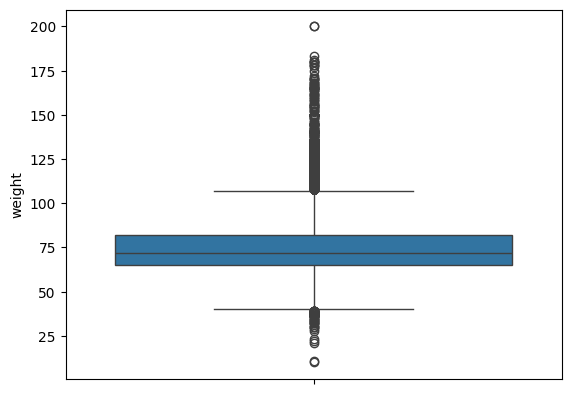

In [10]:
sns.boxplot(cardio_base_df['weight'])
plt.show()

In [11]:
cardio_base_df['height'] = cardio_base_df['height'].apply(lambda x: 220 if x > 220 else x)

In [12]:
cardio_base_df['BMI']=cardio_base_df['weight']/((cardio_base_df['height']/100)**2)

In [13]:
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI
0,0,50,2,168,62.0,110,80,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,0,34.927679
2,2,51,1,165,64.0,130,70,3,0,23.507805
3,3,48,2,169,82.0,150,100,1,0,28.710479
4,4,47,1,156,56.0,100,60,1,0,23.011177
...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,26.927438
69996,99995,61,1,158,126.0,140,90,2,0,50.472681
69997,99996,52,2,183,105.0,180,90,3,0,31.353579
69998,99998,61,1,163,72.0,135,80,1,0,27.099251


In [14]:
cardio_alco_df[['id', 'alco']] = cardio_alco_df['id;alco'].str.split(';', expand=True)

In [15]:
cardio_alco_df.drop(columns='id;alco',inplace=True)

In [16]:
cardio_alco_df.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [17]:
cardio_base_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.358800,74.205690,128.817286,96.630414,1.366871,0.088129,27.556570
std,28851.302323,6.766774,0.476838,8.206438,14.395757,154.011419,188.472530,0.680250,0.283484,6.091400
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,30.222222
max,99999.000000,64.000000,2.000000,220.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,298.666667


In [18]:
cardio_alco_df.describe()

,id,alco
count,56903,56903
unique,56903,2
top,99954,0
freq,1,53862


In [19]:
cardio_alco_df.dtypes

,0
id,object
alco,object


In [20]:
cardio_alco_df=cardio_alco_df.astype({'id':'int64','alco':'int64'})

In [21]:
cardio_df=pd.merge(cardio_base_df,cardio_alco_df,on='id')

In [22]:
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco
0,44,40,1,159,60.0,110,70,1,0,23.733238,0
1,45,56,1,160,73.0,130,85,1,0,28.515625,0
2,46,60,2,173,82.0,140,90,3,0,27.398176,0
3,47,55,1,163,55.0,120,80,1,0,20.700817,0
4,49,50,2,175,95.0,120,80,1,0,31.020408,0
...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,57,1,178,69.0,130,90,1,0,21.777553,0
56899,99950,53,2,155,76.0,130,90,1,0,31.633715,0
56900,99951,61,2,170,72.0,120,80,1,0,24.913495,0
56901,99952,42,2,165,66.0,120,80,1,0,24.242424,0


In [23]:
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco
count,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000
mean,48472.162065,52.841467,1.350667,164.355500,74.163482,129.002408,96.752350,1.367872,0.088554,27.546332,0.053442
std,30994.121701,6.764127,0.477183,8.210532,14.381791,160.259577,189.390334,0.680889,0.284102,6.160248,0.224915
min,44.000000,29.000000,1.000000,55.000000,10.000000,-140.000000,-70.000000,1.000000,0.000000,3.673095,0.000000
25%,20401.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.875115,0.000000
50%,40763.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.346494,0.000000
75%,77109.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,30.119389,0.000000
max,99954.000000,64.000000,2.000000,220.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,298.666667,1.000000


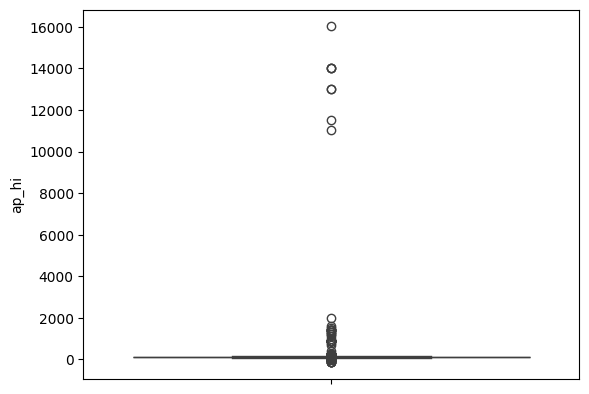

In [24]:
sns.boxplot(cardio_df['ap_hi'])
plt.show()

In [25]:
cardio_df.loc[cardio_df['ap_hi']<0,'ap_hi']=np.nan
cardio_df['ap_lo']=cardio_df['ap_lo'].apply(lambda x: x if x>=0 else np.nan)

In [26]:
cardio_df.dropna(subset=['ap_lo','ap_hi'], inplace=True)

In [27]:
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco
count,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000
mean,48473.179345,52.841676,1.350657,164.355754,74.164187,129.030231,96.757224,1.367882,0.088565,27.546524,0.053448
std,30994.650442,6.763669,0.477180,8.210839,14.381768,160.248936,189.400586,0.680912,0.284117,6.160354,0.224928
min,44.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,0.000000,3.673095,0.000000
25%,20399.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.875115,0.000000
50%,40766.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.346494,0.000000
75%,77110.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,30.119402,0.000000
max,99954.000000,64.000000,2.000000,220.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,298.666667,1.000000


According to health experts, the maximum value of ap high/ap low can be 180/120 higher than that can kill an average human being. So, we will fix the outliers by taking a confidence value of 220 as highest ap high and 160 aplo

In [28]:
cardio_df['ap_hi'].isna().sum()

np.int64(0)

In [29]:
# we will now change the outliers to a maximum value because we believe it to be incorrectly entered.
cardio_df['ap_hi']=cardio_df['ap_hi'].apply(lambda x: (x/100) if x>220 else x)

In [30]:
cardio_df['ap_lo']=cardio_df['ap_lo'].apply(lambda x: (x/100) if x>160 else x)

In [31]:
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco
count,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000,56896.000000
mean,48473.179345,52.841676,1.350657,164.355754,74.164187,126.595860,80.337746,1.367882,0.088565,27.546524,0.053448
std,30994.650442,6.763669,0.477180,8.210839,14.381768,18.252846,12.780424,0.680912,0.284117,6.160354,0.224928
min,44.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,0.000000,3.673095,0.000000
25%,20399.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.875115,0.000000
50%,40766.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.346494,0.000000
75%,77110.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,30.119402,0.000000
max,99954.000000,64.000000,2.000000,220.000000,200.000000,220.000000,160.000000,3.000000,1.000000,298.666667,1.000000


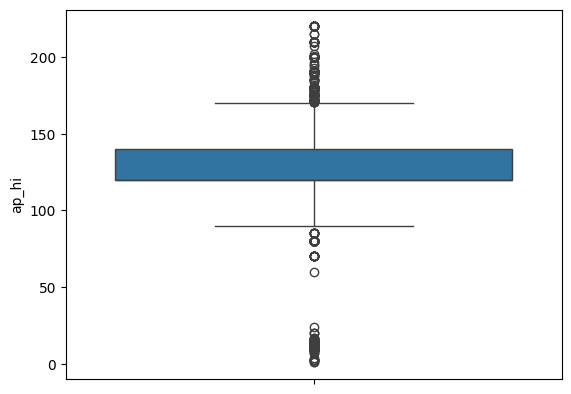

In [32]:
sns.boxplot(cardio_df['ap_hi'])
plt.show()

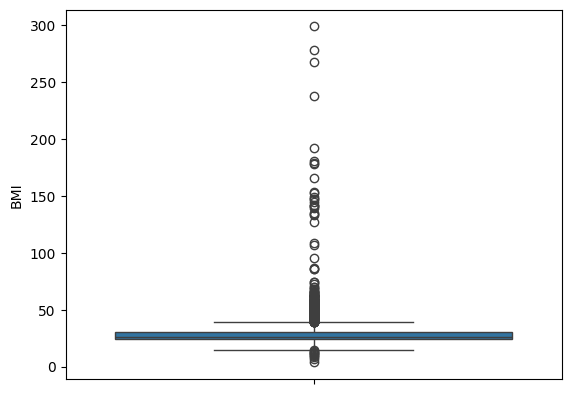

In [33]:
sns.boxplot(cardio_df['BMI'])
plt.show()

In [34]:
cardio_df[cardio_df['BMI']>34]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco
14,61,49,1,162,107.0,150.0,90.0,2,0,40.771224,0
22,69,53,1,152,79.0,130.0,90.0,1,0,34.193213,0
33,87,59,1,148,80.0,130.0,90.0,1,0,36.523009,0
51,114,53,1,152,110.0,160.0,90.0,1,0,47.610803,0
55,119,53,2,166,94.0,140.0,90.0,2,0,34.112353,0
...,...,...,...,...,...,...,...,...,...,...,...
56836,99844,49,1,159,89.0,120.0,80.0,1,0,35.204304,0
56861,99882,63,1,164,98.0,140.0,90.0,2,0,36.436645,1
56870,99901,43,1,143,70.0,120.0,90.0,2,0,34.231503,0
56882,99925,58,1,164,115.0,130.0,80.0,1,0,42.757287,0


In [35]:
bins=[30,40,50,60,np.inf]
labels=['Adult','Middle Age','Senior','Old']

In [36]:
cardio_df['Age Groups']=pd.cut(cardio_df['age'],bins=bins,labels=labels,include_lowest=True)

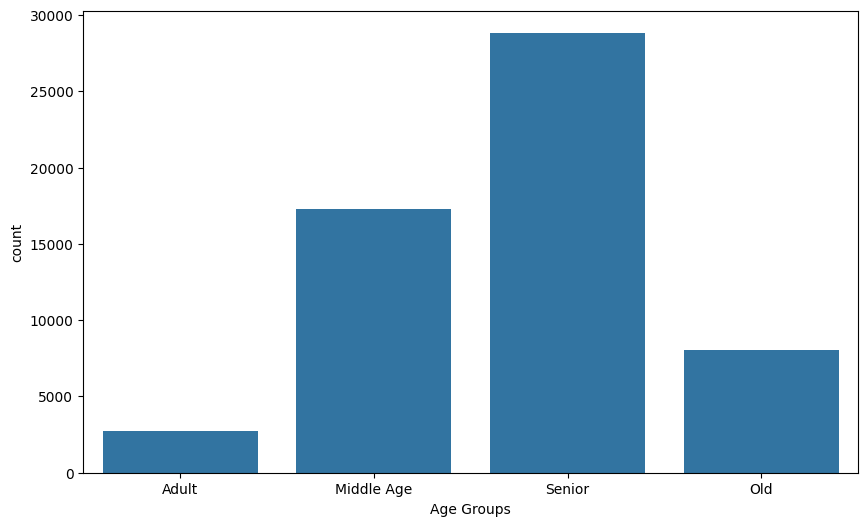

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=cardio_df,x='Age Groups')
plt.show()

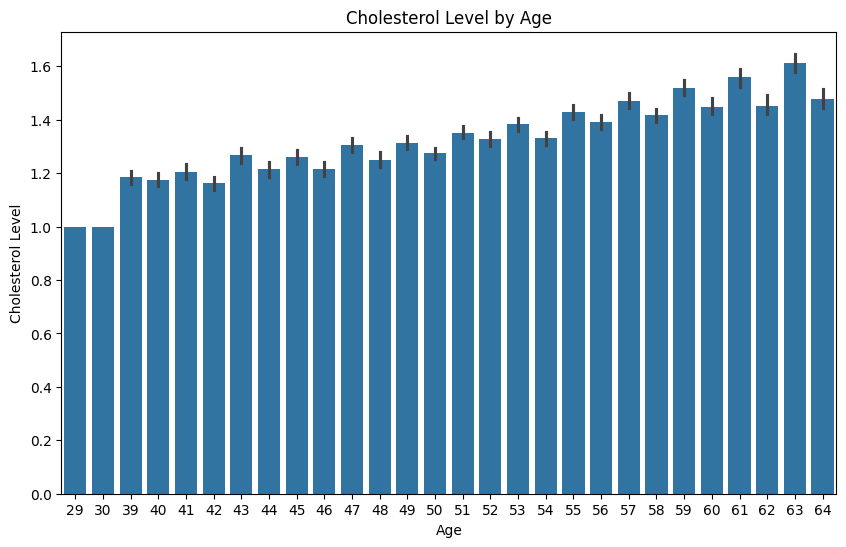

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=cardio_df, x='age', y='cholesterol')
plt.title('Cholesterol Level by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

/tmp/ipython-input-39-2388834569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_consumption = cardio_df.groupby('Age Groups')['alco'].value_counts(normalize=True).unstack()


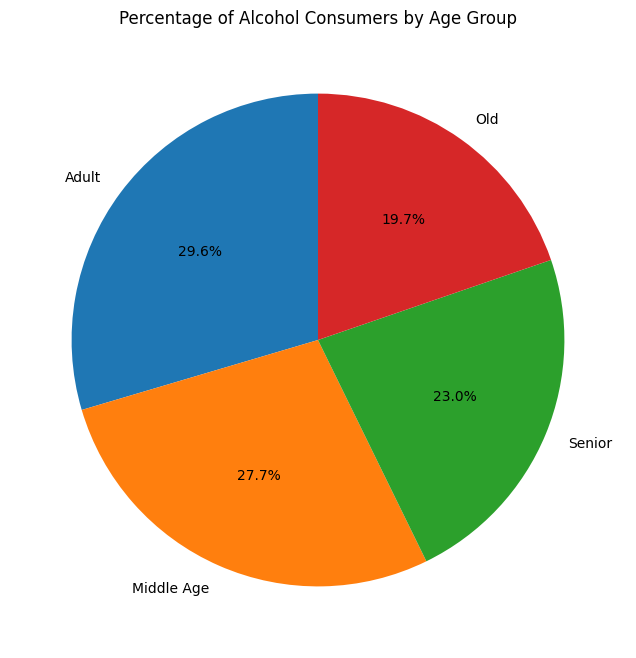

In [39]:
alcohol_consumption = cardio_df.groupby('Age Groups')['alco'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 8))
plt.pie(alcohol_consumption[1], labels=alcohol_consumption.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Alcohol Consumers by Age Group')
plt.show()

Do old people have more cholestrol?

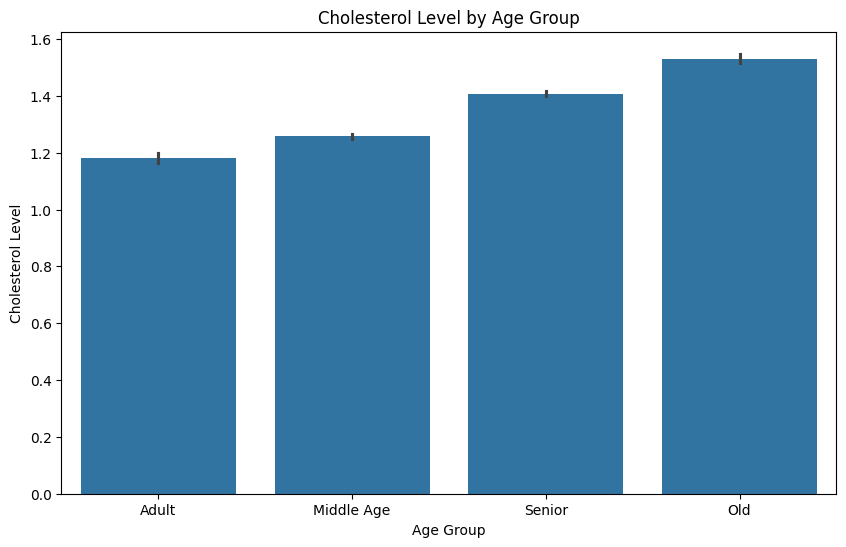

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data=cardio_df, x='Age Groups', y='cholesterol')
plt.title('Cholesterol Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Level')
plt.show()

/tmp/ipython-input-41-679079252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_consumption = cardio_df.groupby('Age Groups')['smoke'].value_counts(normalize=True).unstack()


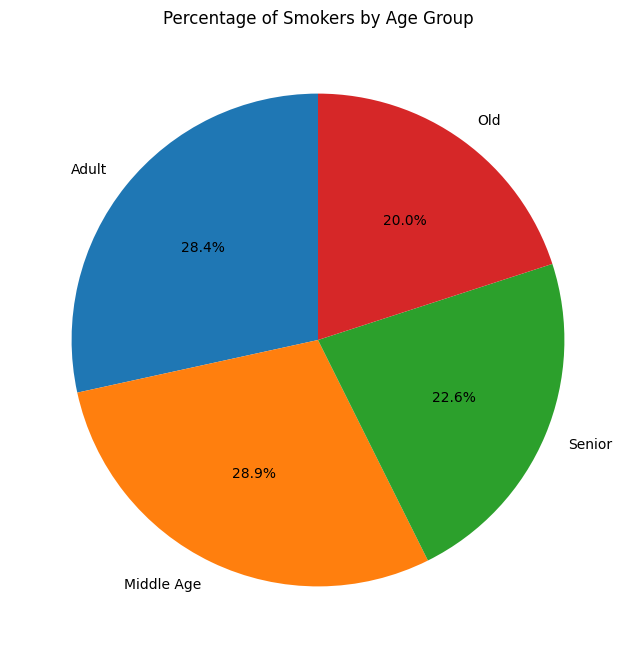

In [41]:
smoke_consumption = cardio_df.groupby('Age Groups')['smoke'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 8))
plt.pie(smoke_consumption[1], labels=smoke_consumption.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Smokers by Age Group')
plt.show()

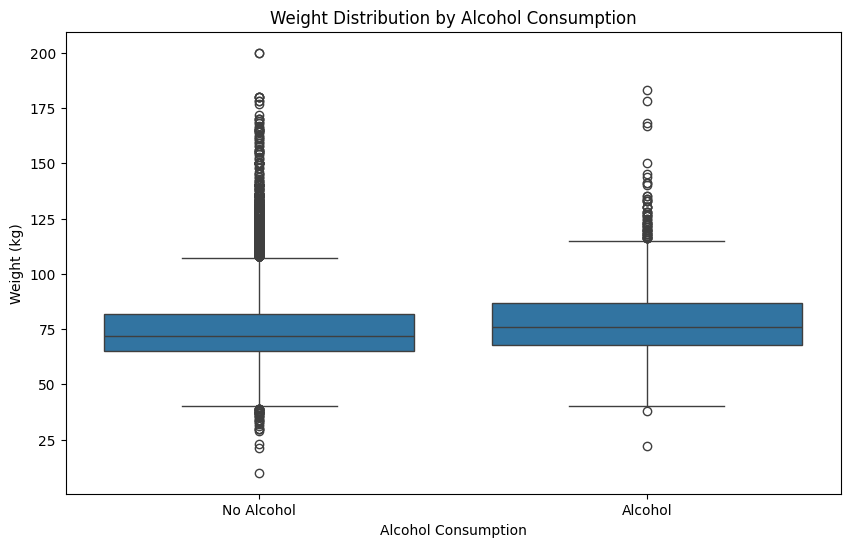

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=cardio_df, x='alco', y='weight')
plt.title('Weight Distribution by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Weight (kg)')
plt.xticks([0, 1], ['No Alcohol', 'Alcohol'])
plt.show()

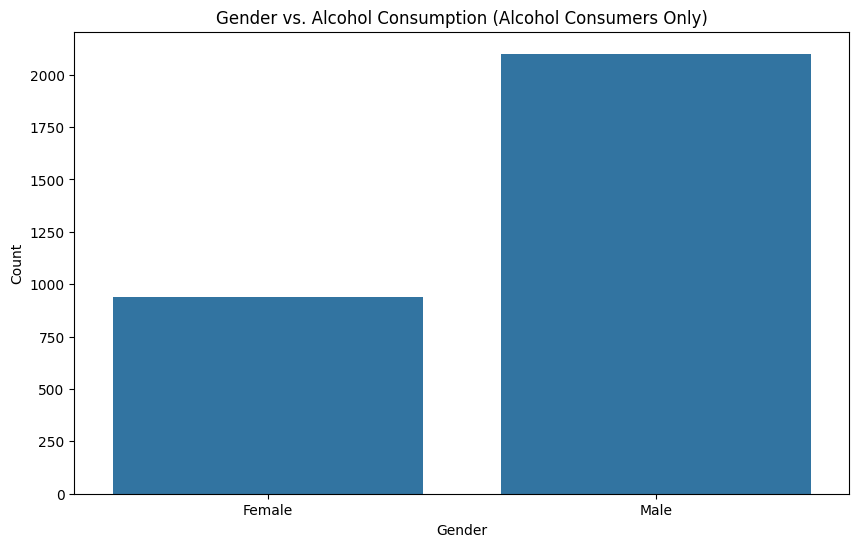

In [43]:
#Gender vs. Alcohol Consumption
plt.figure(figsize=(10, 6))
sns.countplot(data=cardio_df[cardio_df['alco'] == 1], x='gender')
plt.title('Gender vs. Alcohol Consumption (Alcohol Consumers Only)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male']) # Assuming 1=Female, 2=Male based on typical datasets
plt.show()

In [44]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,alco,Age Groups
0,44,40,1,159,60.0,110.0,70.0,1,0,23.733238,0,Adult
1,45,56,1,160,73.0,130.0,85.0,1,0,28.515625,0,Senior
2,46,60,2,173,82.0,140.0,90.0,3,0,27.398176,0,Senior
3,47,55,1,163,55.0,120.0,80.0,1,0,20.700817,0,Senior
4,49,50,2,175,95.0,120.0,80.0,1,0,31.020408,0,Middle Age


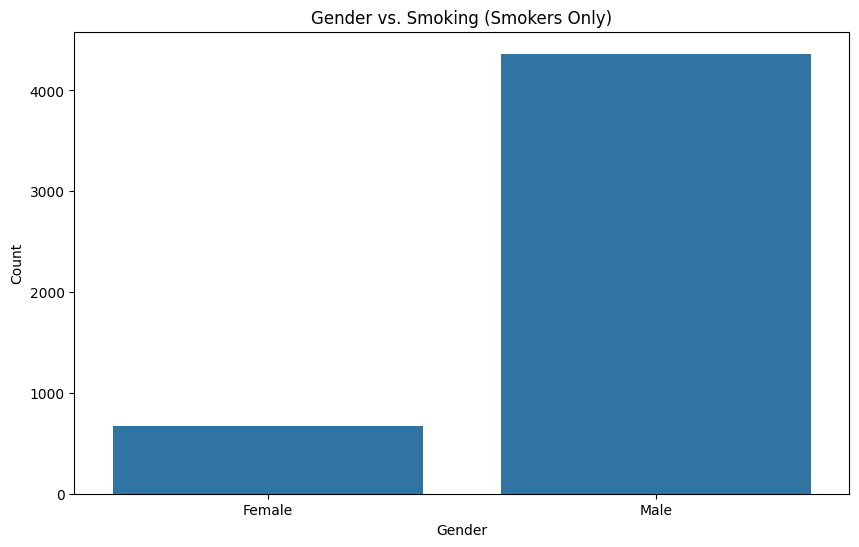

In [45]:
# Gender vs. Smoking
plt.figure(figsize=(10, 6))
sns.countplot(data=cardio_df[cardio_df['smoke'] == 1], x='gender')
plt.title('Gender vs. Smoking (Smokers Only)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male']) # Assuming 1=Female, 2=Male based on the dataset description
plt.show()

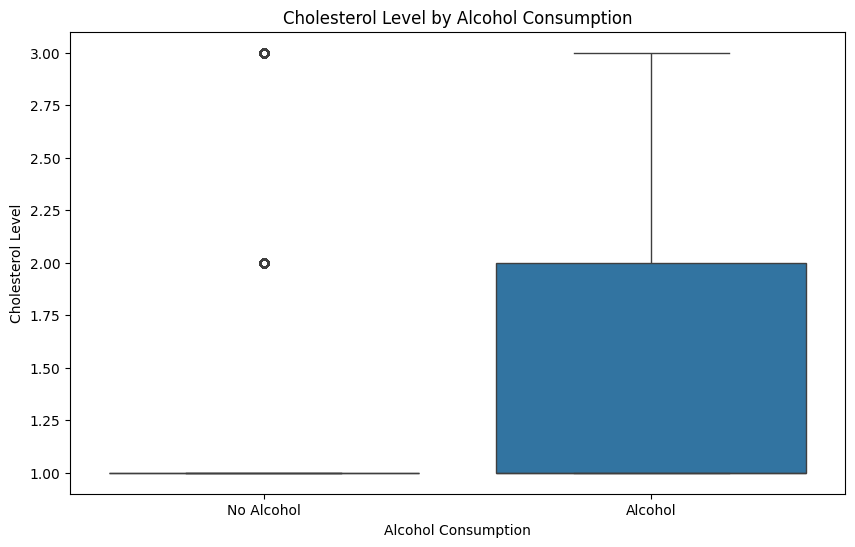

In [46]:
# Cholesterol vs. Alcohol Consumption
plt.figure(figsize=(10, 6))
sns.boxplot(data=cardio_df, x='alco', y='cholesterol')
plt.title('Cholesterol Level by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Cholesterol Level')
plt.xticks([0, 1], ['No Alcohol', 'Alcohol'])
plt.show()

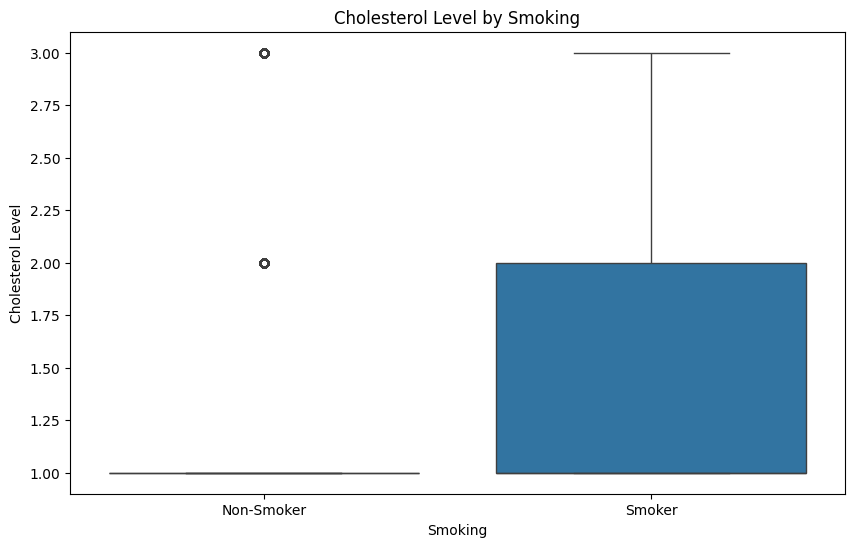

In [47]:
# Smoke vs. Cholesterol
plt.figure(figsize=(10, 6))
sns.boxplot(data=cardio_df, x='smoke', y='cholesterol')
plt.title('Cholesterol Level by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Cholesterol Level')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

In [48]:
cardio_df.to_csv('cardio_df.csv',index=False)

H₀: There is no significant difference in BMI between different Age Groups.
→ H₁: There is a significant difference in BMI across Age Groups.

H₀: Smoking does not affect blood pressure (ap_hi or ap_lo).
→ H₁: Smokers have significantly different blood pressure compared to non-smokers.

H₀: Cholesterol level is independent of alcohol consumption.
→ H₁: Alcohol consumers have significantly different cholesterol levels than non-consumers.

H₀: Males and females have the same average BMI.
→ H₁: There is a significant gender difference in BMI.

H₀: Mean systolic blood pressure (ap_hi) is the same across all cholesterol levels.
→ H₁: It varies with cholesterol level.

In [49]:
hypothesis=[]

In [50]:
from scipy import stats

# Drop rows where 'Age Groups' is NaN (might occur for ages outside the defined bins)
df_anova = cardio_df.dropna(subset=['Age Groups'])

# Create a list of BMI values for each age group
adult_bmi = df_anova[df_anova['Age Groups'] == 'Adult']['BMI']
middle_age_bmi = df_anova[df_anova['Age Groups'] == 'Middle Age']['BMI']
senior_bmi = df_anova[df_anova['Age Groups'] == 'Senior']['BMI']
old_bmi = df_anova[df_anova['Age Groups'] == 'Old']['BMI']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(adult_bmi, middle_age_bmi, senior_bmi, old_bmi)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in BMI across Age Groups.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in BMI between different Age Groups.")

hypothesis.append({"hypothesis": "H₀: There is no significant difference in BMI between different Age Groups. → H₁: There is a significant difference in BMI across Age Groups.", "p_value": p_value, "alpha": alpha, "result": "Reject H0" if p_value < alpha else "Fail to reject H0"})

ANOVA F-statistic: 123.3257
ANOVA P-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference in BMI across Age Groups.


In [51]:
from scipy import stats

# Separate data for smokers and non-smokers
smokers_df = cardio_df[cardio_df['smoke'] == 1]
non_smokers_df = cardio_df[cardio_df['smoke'] == 0]

# Perform independent t-tests for ap_hi and ap_lo
t_stat_hi, p_value_hi = stats.ttest_ind(smokers_df['ap_hi'], non_smokers_df['ap_hi'], nan_policy='omit')
t_stat_lo, p_value_lo = stats.ttest_ind(smokers_df['ap_lo'], non_smokers_df['ap_lo'], nan_policy='omit')

print(f"\nIndependent t-test for ap_hi (Smokers vs Non-Smokers):")
print(f"  t-statistic: {t_stat_hi:.4f}")
print(f"  P-value: {p_value_hi:.4f}")

print(f"\nIndependent t-test for ap_lo (Smokers vs Non-Smokers):")
print(f"  t-statistic: {t_stat_lo:.4f}")
print(f"  P-value: {p_value_lo:.4f}")

# Interpret the results
alpha = 0.05

if p_value_hi < alpha:
    print("Result for ap_hi: Reject the null hypothesis. Smokers have significantly different ap_hi compared to non-smokers.")
else:
    print("Result for ap_hi: Fail to reject the null hypothesis. There is no significant difference in ap_hi between smokers and non-smokers.")

if p_value_lo < alpha:
    print("Result for ap_lo: Reject the null hypothesis. Smokers have significantly different ap_lo compared to non-smokers.")
else:
    print("Result for ap_lo: Fail to reject the null hypothesis. There is no significant difference in ap_lo between smokers and non-smokers.")

hypothesis.append({"hypothesis": "H₀: Smoking does not affect systolic blood pressure (ap_hi). → H₁: Smokers have significantly different systolic blood pressure compared to non-smokers.", "p_value": p_value_hi, "alpha": alpha, "result": "Reject H0" if p_value_hi < alpha else "Fail to reject H0"})
hypothesis.append({"hypothesis": "H₀: Smoking does not affect diastolic blood pressure (ap_lo). → H₁: Smokers have significantly different diastolic blood pressure compared to non-smokers.", "p_value": p_value_lo, "alpha": alpha, "result": "Reject H0" if p_value_lo < alpha else "Fail to reject H0"})

print("\nHypothesis Test Results Summary:")
for hypo in hypothesis:
    print(f"- {hypo['hypothesis']}")
    print(f"  P-value: {hypo['p_value']:.4f}, Alpha: {hypo['alpha']}")
    print(f"  Result: {hypo['result']}")


Independent t-test for ap_hi (Smokers vs Non-Smokers):
  t-statistic: 6.8561
  P-value: 0.0000

Independent t-test for ap_lo (Smokers vs Non-Smokers):
  t-statistic: 3.8674
  P-value: 0.0001
Result for ap_hi: Reject the null hypothesis. Smokers have significantly different ap_hi compared to non-smokers.
Result for ap_lo: Reject the null hypothesis. Smokers have significantly different ap_lo compared to non-smokers.

Hypothesis Test Results Summary:
- H₀: There is no significant difference in BMI between different Age Groups. → H₁: There is a significant difference in BMI across Age Groups.
  P-value: 0.0000, Alpha: 0.05
  Result: Reject H0
- H₀: Smoking does not affect systolic blood pressure (ap_hi). → H₁: Smokers have significantly different systolic blood pressure compared to non-smokers.
  P-value: 0.0000, Alpha: 0.05
  Result: Reject H0
- H₀: Smoking does not affect diastolic blood pressure (ap_lo). → H₁: Smokers have significantly different diastolic blood pressure compared to n

In [52]:
hypothesis

[{'hypothesis': 'H₀: There is no significant difference in BMI between different Age Groups. → H₁: There is a significant difference in BMI across Age Groups.',
  'p_value': np.float64(1.2775283948759067e-79),
  'alpha': 0.05,
  'result': 'Reject H0'},
 {'hypothesis': 'H₀: Smoking does not affect systolic blood pressure (ap_hi). → H₁: Smokers have significantly different systolic blood pressure compared to non-smokers.',
  'p_value': np.float64(7.149619711212387e-12),
  'alpha': 0.05,
  'result': 'Reject H0'},
 {'hypothesis': 'H₀: Smoking does not affect diastolic blood pressure (ap_lo). → H₁: Smokers have significantly different diastolic blood pressure compared to non-smokers.',
  'p_value': np.float64(0.00011011908312776167),
  'alpha': 0.05,
  'result': 'Reject H0'}]